# 0. Hyperparameters
and imports

In [1]:
from evaluate_yolo_tracker import evaluate_sequence
import matplotlib.pyplot as plt
from ultralytics import YOLO
import pandas as pd
import numpy as np
import cv2
import os

# 1. Run Tracking

In [2]:
IOU_ASSOCIATION_TRESHOLD = 0.5
CONF_TRESHOLD = 0.2

Evaluating val1_difficult1
running detection only...
Processing frame 570

processed 20 frames
sequence processing time: 2.359478235244751
Evaluating val1_difficult2
running detection only...
Processing frame 570

processed 20 frames
sequence processing time: 1.2963676452636719
Evaluating val1_easy1
running detection only...
Processing frame 570

processed 20 frames
sequence processing time: 1.1825556755065918
Evaluating val1_easy2
running detection only...
Processing frame 570

processed 20 frames
sequence processing time: 1.2766542434692383
Evaluating val1_medium1
running detection only...
Processing frame 570

processed 20 frames
sequence processing time: 1.1750576496124268
Evaluating val1_medium2
running detection only...
Processing frame 570

processed 20 frames
sequence processing time: 1.1524803638458252
Evaluating sp_natgeo2
running detection only...
Processing frame 480

processed 17 frames
sequence processing time: 2.5085504055023193
Evaluating gfp_hawaii1
running detection o

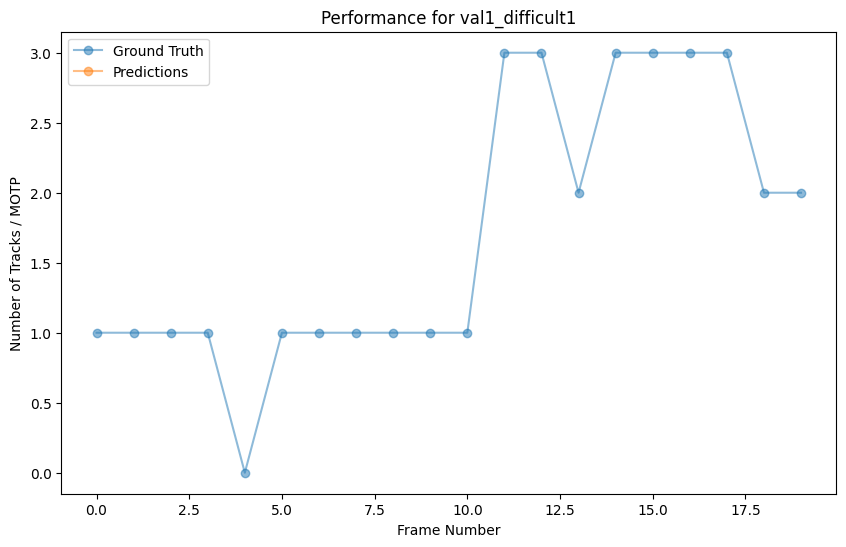

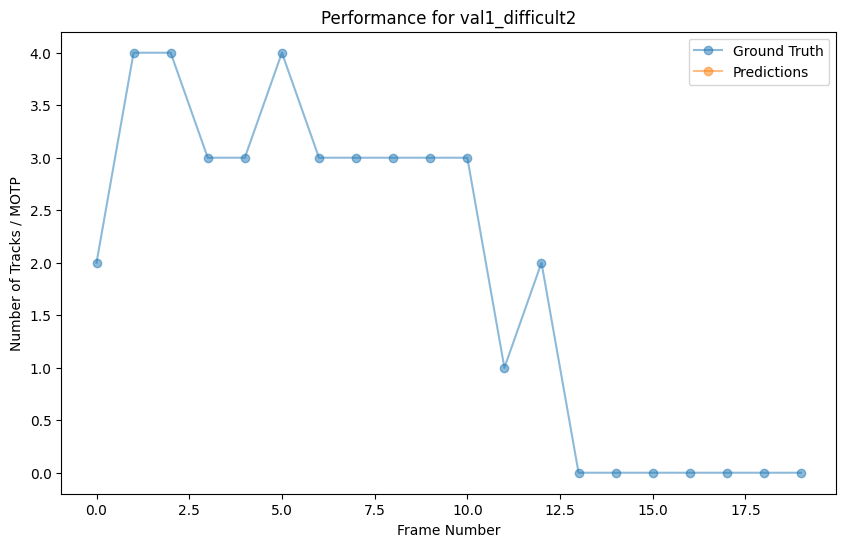

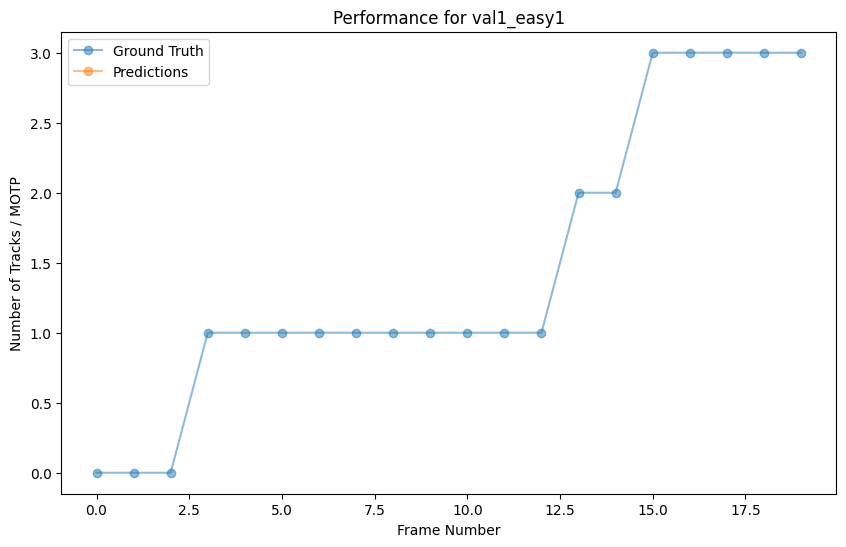

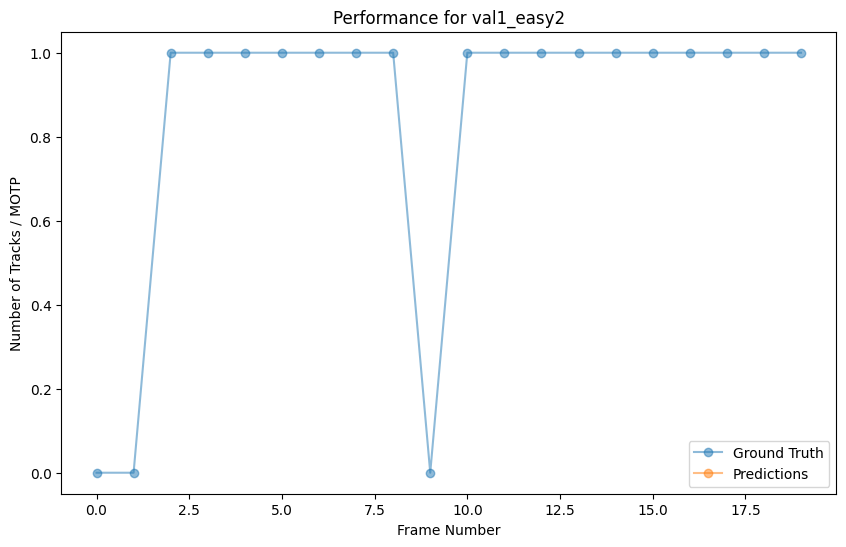

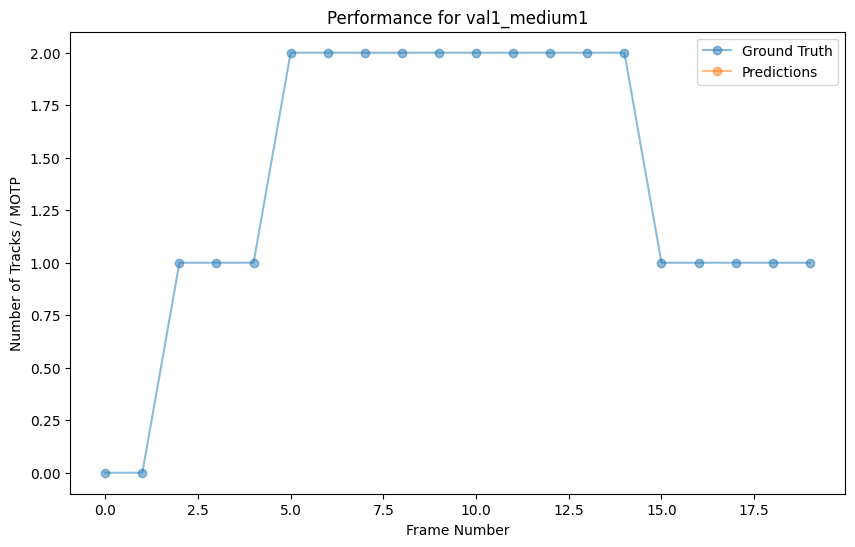

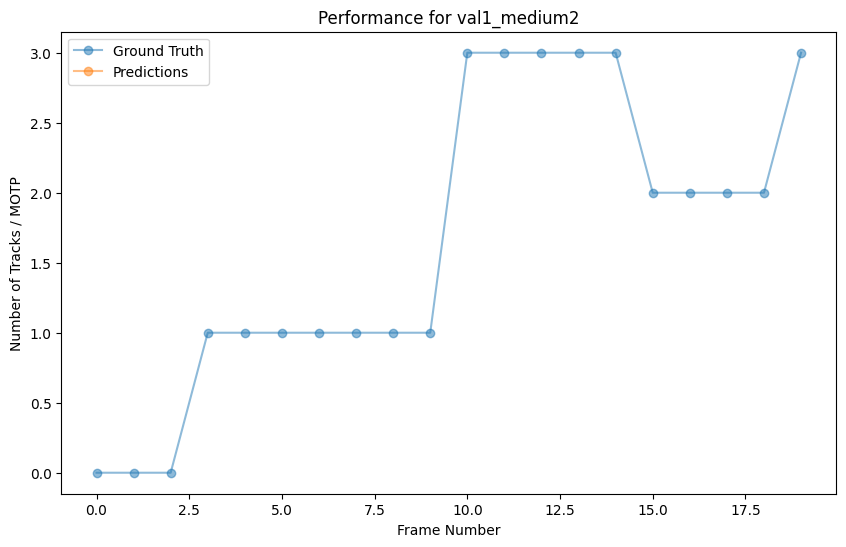

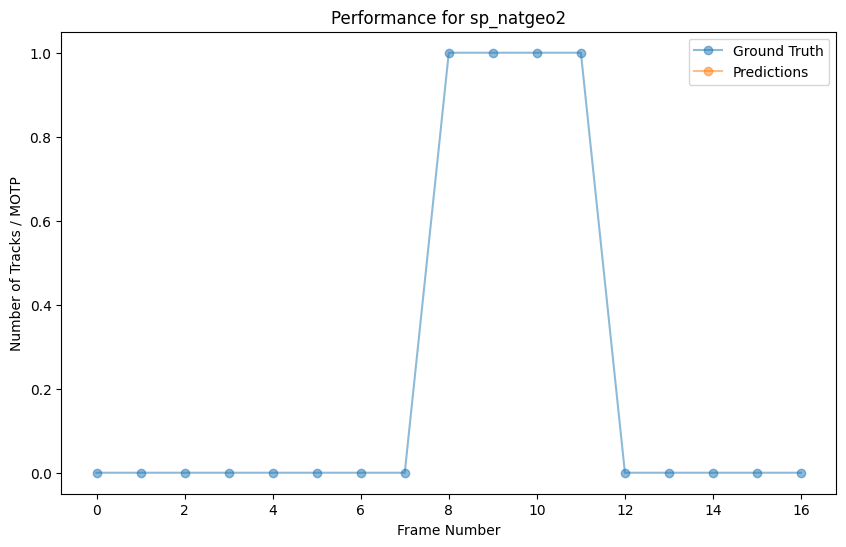

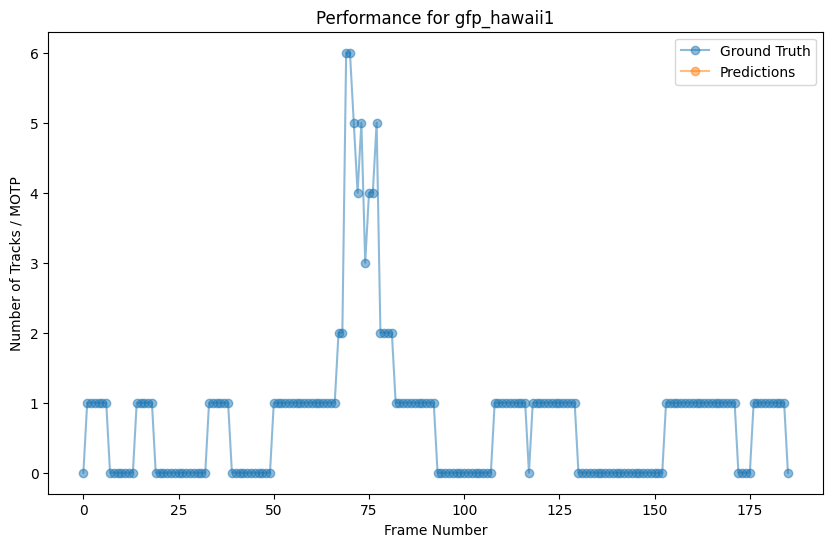

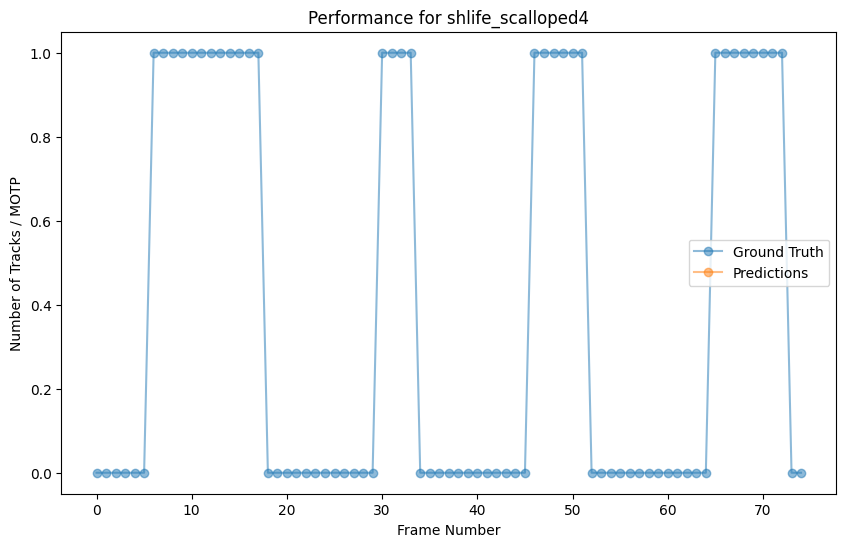

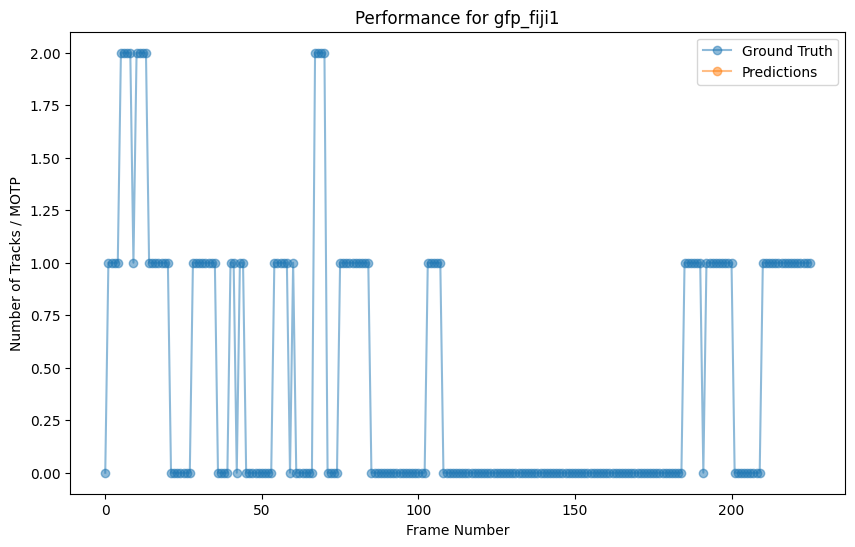

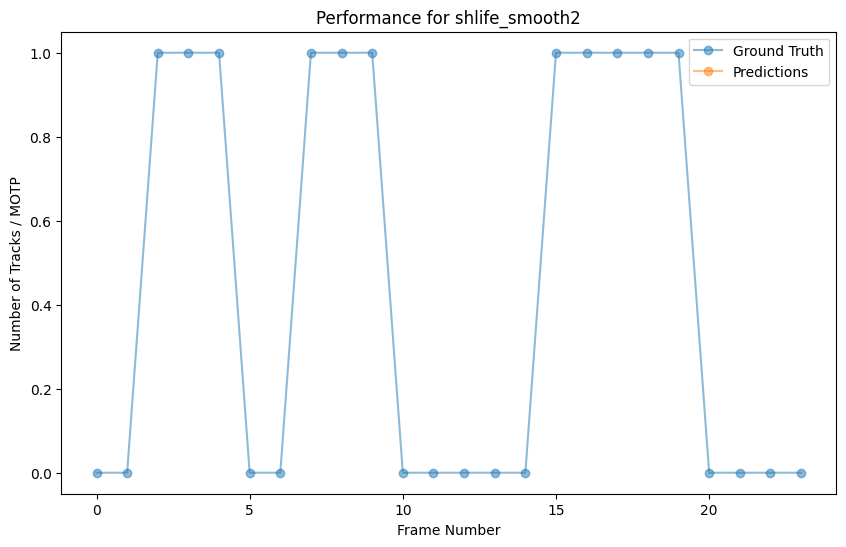

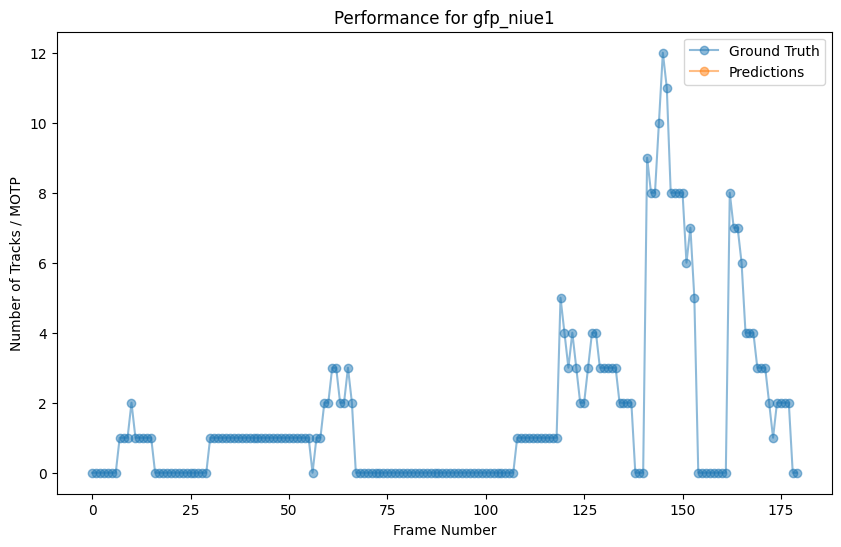

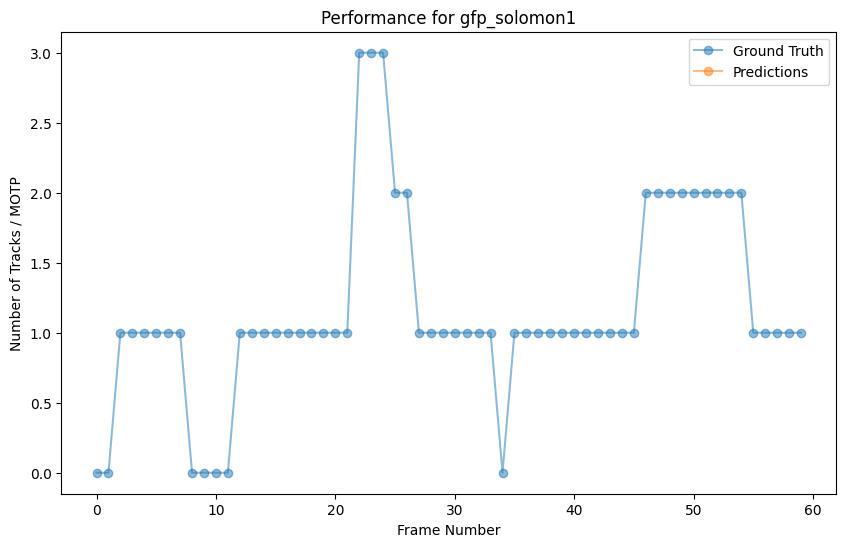

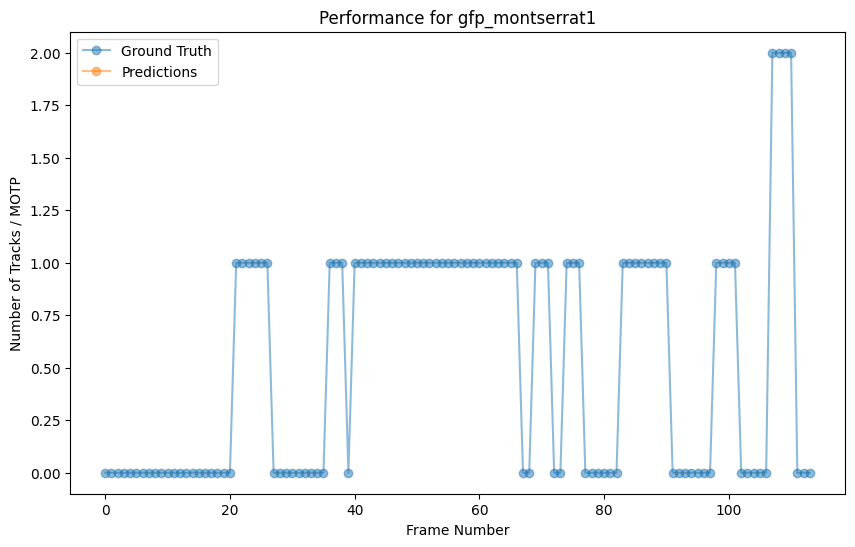

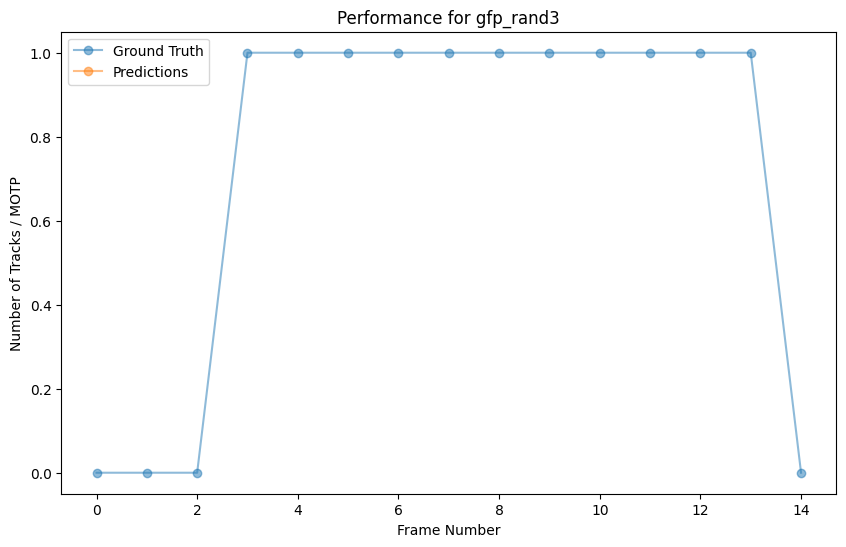

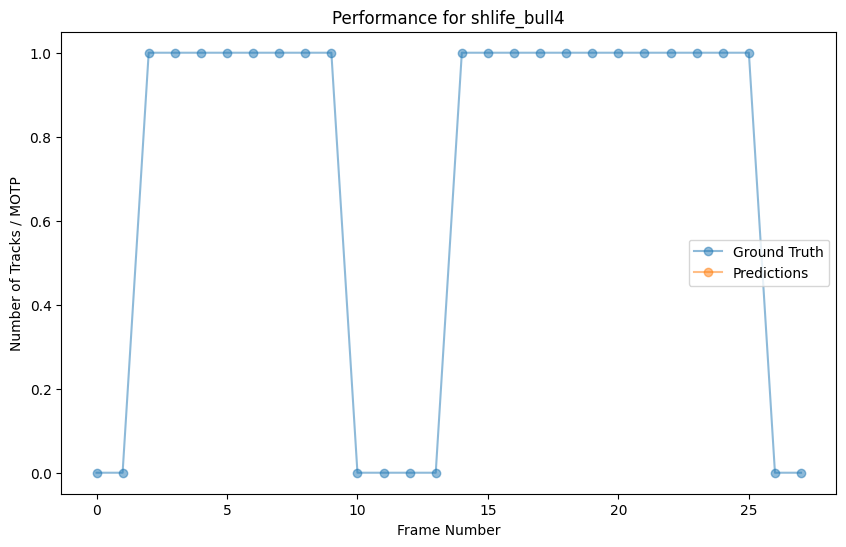

In [3]:
project = '/vol/biomedic3/bglocker/ugproj2324/fv220/dev/SharkTrack-Dev/models/p2v4_new_1000e_no_patience/'
model_path = os.path.join(project, 'weights/best.pt')

motas, motps, idf1s, _, _, performance_plots, aligned_annotations_list = evaluate_sequence(model_path, CONF_TRESHOLD, IOU_ASSOCIATION_TRESHOLD, imgsz=640, tracker=None)
mota = np.mean(motas)
motp = np.mean(motps)
idf1 = np.mean(idf1s)
print(f'MOTA: {mota}, MOTP: {motp}, IDF1: {idf1}')

# Investigate with GT
For frames with poor graph performance, show the GT and PRED bounding boxes

In [11]:
def draw_bbox(img, gt_bbox, pred_bbox):
  color1 = (0, 255, 0)
  color2 = (0, 0, 255)

  for bbox in gt_bbox:
    bbox = np.array(bbox).astype(int)
    pt1, pt2 = (bbox[0], bbox[1]), (bbox[2], bbox[3])
    img = cv2.rectangle(img, pt1, pt2, color1, int(max(img.shape[:2]) / 200))

  for bbox in pred_bbox:
    bbox = np.array(bbox).astype(int)
    pt1, pt2 = (bbox[0], bbox[1]), (bbox[2], bbox[3])
    img = cv2.rectangle(img, pt1, pt2, color2, int(max(img.shape[:2]) / 200))

  # Add legend for color
  img = cv2.putText(img, 'Ground Truth', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, color1, 2, cv2.LINE_AA)
  img = cv2.putText(img, 'Predictions', (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, color2, 2, cv2.LINE_AA)
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img_rgb)


def plot_frame(frame_path, frame_num, aligned_annotations):
  """
  Plots the ground truth and predicted bounding boxes of a given frame.
  """
  gt_bbox = aligned_annotations['gt_bbox_xyxys'][frame_num]
  pred_bbox = aligned_annotations['pred_bbox_xyxys'][frame_num]

  # Convert frame number to timestamp (in milliseconds)
  timestamp = (frame_num / 10) * 1000  # frame_num / fps * 1000

  # Read the frame
  frame = cv2.imread(frame_path)

  # Plot the ground truth and predicted bounding boxes
  draw_bbox(frame, gt_bbox, pred_bbox)

In [4]:
aligned_annotations_list[0]

{'gt_bbox_xyxys': [[[611, 355, 1275, 692]],
  [[587, 440, 1066, 692]],
  [[368, 339, 1027, 689]],
  [[494, 453, 1228, 710]],
  [],
  [[788, 478, 1274, 703]],
  [[512, 266, 1280, 654]],
  [[264, 186, 972, 694]],
  [[664, 344, 1134, 718]],
  [[696, 450, 1248, 718]],
  [[399, 432, 1161, 712]],
  [[715, 339, 1280, 619], [726, 386, 955, 486], [674, 580, 918, 720]],
  [[978, 283, 1280, 523], [603, 381, 776, 473], [648, 562, 919, 720]],
  [[538, 385, 671, 462], [439, 497, 868, 713]],
  [[806, 8, 1280, 332], [406, 399, 558, 479], [299, 443, 639, 646]],
  [[295, 8, 1280, 251], [233, 431, 405, 524], [214, 478, 566, 713]],
  [[0, 8, 1059, 322], [189, 453, 360, 536], [214, 569, 706, 713]],
  [[0, 8, 427, 225], [189, 453, 346, 578], [387, 578, 778, 713]],
  [[204, 458, 482, 645], [642, 578, 894, 713]],
  [[122, 556, 513, 712], [634, 553, 928, 713]]],
 'gt_track_ids': [[5],
  [5],
  [5],
  [5],
  [],
  [6],
  [6],
  [6],
  [6],
  [6],
  [1],
  [1, 3, 4],
  [1, 3, 4],
  [3, 4],
  [2, 3, 4],
  [2, 3, 

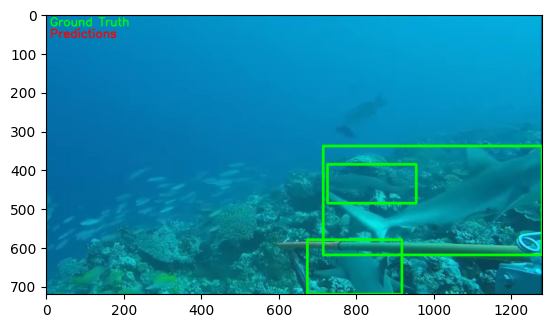

In [31]:
dataset = '/vol/biomedic3/bglocker/ugproj2324/fv220/datasets/phase2'
sequence = 'val1_difficult1'
frame_to_inspect = 11
frame_name = f'{sequence}_frame{frame_to_inspect*30}.jpg'
frame_path = os.path.join(dataset, sequence, frame_name)
plot_frame(frame_path, frame_to_inspect, aligned_annotations_list[0])


0: 384x640 3 sharks, 21.8ms
Speed: 1.4ms preprocess, 21.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


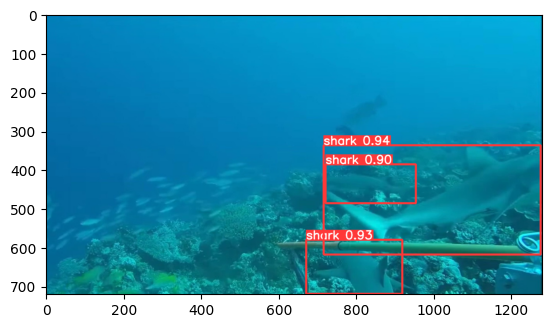

In [32]:
from ultralytics import YOLO

model = YOLO(model_path)

results = model([frame_path])  # return a generator of Results objects

# Process results generator
for result in results:
    img = result.plot()
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    # boxes = result.boxes  # Boxes object for bounding box outputs
    # masks = result.masks  # Masks object for segmentation masks outputs
    # keypoints = result.keypoints  # Keypoints object for pose outputs
    # probs = result.probs  # Probs object for classification outputs
    # result.show()  # display to screen

# Investigate Inference

In [12]:
def get_bboxes(df, frame_num):
  """
  Given dataframe with following columns:
  row['4-7: Img-bbox(TL_x']
  row['TL_y']
  row['BR_x']
  row['BR_y)']

  extract list of bounding boxes for col '3: Unique Frame Identifier' = frame_num
  """
  return df[df['3: Unique Frame Identifier'] == frame_num][['4-7: Img-bbox(TL_x', 'TL_y', 'BR_x', 'BR_y)']].values.tolist()

def plot_from_video(video, frame_num, fps, annotations):
  """
  Plots the ground truth and predicted bounding boxes of a given frame.
  """
  pred_bbox = get_bboxes(annotations, frame_num)

  # Convert frame number to timestamp (in milliseconds)
  timestamp = (frame_num / fps) * 1000  # frame_num / fps * 1000

  # Extract the frame from the video at the specific timestamp
  cap = cv2.VideoCapture(video)
  cap.set(cv2.CAP_PROP_POS_MSEC, timestamp)
  ret, frame = cap.read()
  cap.release()


  # Plot the ground truth and predicted bounding boxes
  draw_bbox(frame, [], pred_bbox)


In [ ]:
annotations = '/vol/biomedic3/bglocker/ugproj2324/fv220/datasets/annotations/mwitt/AXA_NOV23_v3_non_empty_2'

for bruv in os.listdir(annotations):
  if not bruv == 'AXA_2023-2121011':
    continue
  for annotation in os.listdir(os.path.join(annotations, bruv))[::-1]:
    assert annotation.endswith('.csv')
    video_path = os.path.join('/vol/biomedic3/bglocker/ugproj2324/fv220/datasets/videos_raw/mwitt/AXA_NOV23_no_streams', bruv, annotation.replace('_tracks_5fps.csv', '.mp4'))
    predictions = os.path.join(annotations, bruv, annotation)
    predictions_df = pd.read_csv(predictions, skiprows=lambda x: x in [1])

    print(f'processing {predictions}...')

    fps = 5
    frames = set()
    for index, row in predictions_df.iterrows():
      frame_to_inspect = row['3: Unique Frame Identifier']
      conf = row['8: Detection or Length Confidence']
      if any([frame_to_inspect + n in frames for n in range(-5, 5)]):
        continue
      frames.add(frame_to_inspect)
      print(f'{frame_to_inspect=}, {conf=}, time: {frame_to_inspect/fps}, {predictions.replace("/vol/biomedic3/bglocker/ugproj2324/fv220/datasets/annotations/mwitt/AXA_NOV23_v3_non_empty_2/", "")}')
      plot_from_video(video_path, frame_to_inspect, fps, predictions_df)
      plt.pause(1)


annotations = '/vol/biomedic3/bglocker/ugproj2324/fv220/datasets/annotations/mwitt/AXA_NOV23_v3_non_empty_2'

for bruv in os.listdir(annotations)[:5]:
  if not bruv == 'AXA_2023-2121011':
    continue
  for annotation in os.listdir(os.path.join(annotations, bruv))[::-1]:
  for annotation in os.listdir(os.path.join(annotations, bruv)):
    assert annotation.endswith('.csv')
    video_path = os.path.join('/vol/biomedic3/bglocker/ugproj2324/fv220/datasets/videos_raw/mwitt/AXA_NOV23_no_streams', bruv, annotation.replace('_tracks_5fps.csv', '.mp4'))
    predictions = os.path.join(annotations, bruv, annotation)
    predictions_df = pd.read_csv(predictions, skiprows=lambda x: x in [1])

    print(f'processing {predictions}...')

    fps = 5
    frames = set()
    for index, row in predictions_df.iterrows():
      frame_to_inspect = row['3: Unique Frame Identifier']
      conf = row['8: Detection or Length Confidence']
      track_id = row['# 1: Detection or Track-id']
      if any([frame_to_inspect + n in frames for n in range(-5, 5)]):
        continue
      frames.add(frame_to_inspect)
      print(f'{frame_to_inspect=}, {conf=}, {track_id=}, time: {frame_to_inspect/fps}, {predictions.replace("/vol/biomedic3/bglocker/ugproj2324/fv220/datasets/annotations/mwitt/AXA_NOV23_v3_non_empty_2/", "")}')
      plot_from_video(video_path, frame_to_inspect, fps, predictions_df)
      plt.pause(1)










# 7. Bulk-Test all videos

In [18]:
video_folder = '/vol/biomedic3/bglocker/ugproj2324/fv220/datasets/sharktrack_test/grayscale_videos/'
annotations_folder = '/vol/biomedic3/bglocker/ugproj2324/fv220/datasets/sharktrack_test/annotations/'
model_path = '/vol/biomedic3/bglocker/ugproj2324/fv220/dev/shark_locator_tests/runs/detect/train3/weights/best.pt'

testing model /vol/biomedic3/bglocker/ugproj2324/fv220/dev/shark_locator_tests/runs/detect/train3/weights/best.pt
Evaluating medium1.mp4

WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

medium1.mp4 - MOTA: 0.28, MOTP: 0.26, IDF1: 0.43


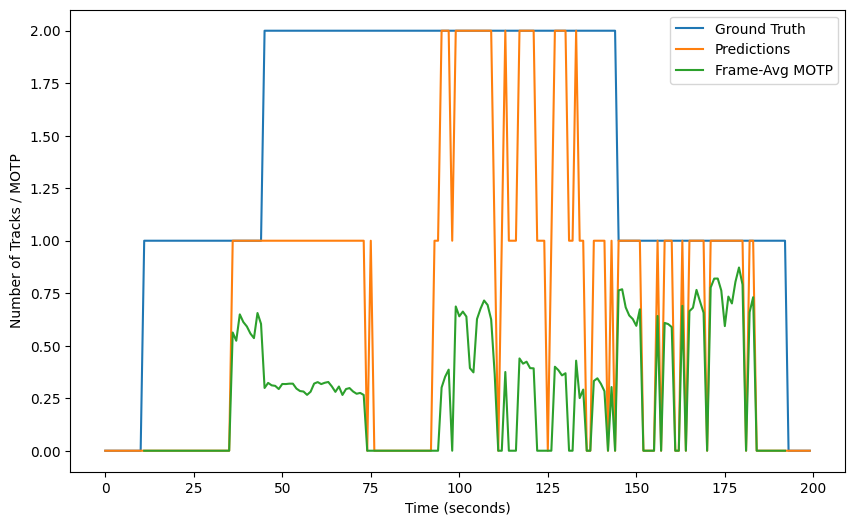

Evaluating easy1.mp4

WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

easy1.mp4 - MOTA: 0.78, MOTP: 0.63, IDF1: 0.69


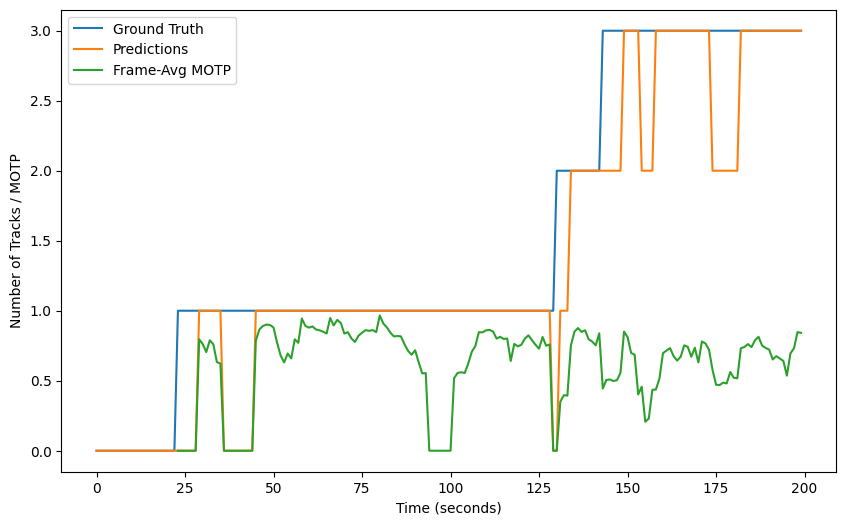

Evaluating difficult2.mp4

WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

difficult2.mp4 - MOTA: 0.27, MOTP: 0.29, IDF1: 0.41


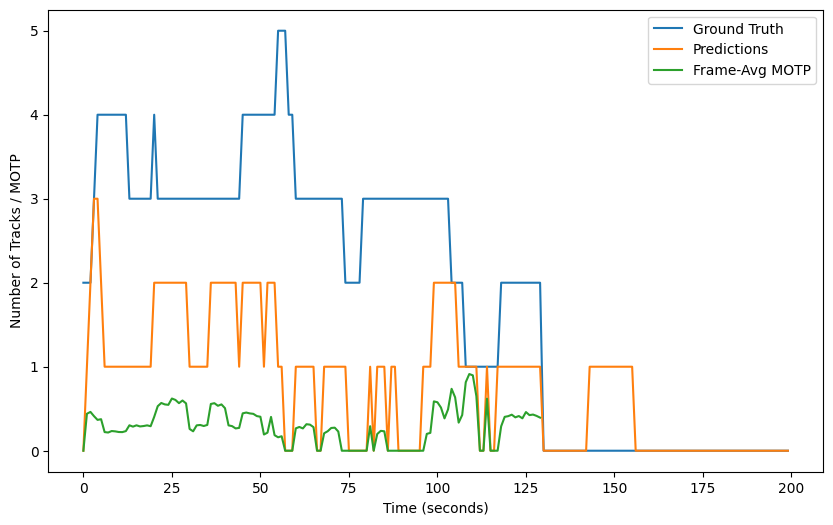

Evaluating difficult1.mp4

WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

difficult1.mp4 - MOTA: 0.21, MOTP: 0.17, IDF1: 0.35


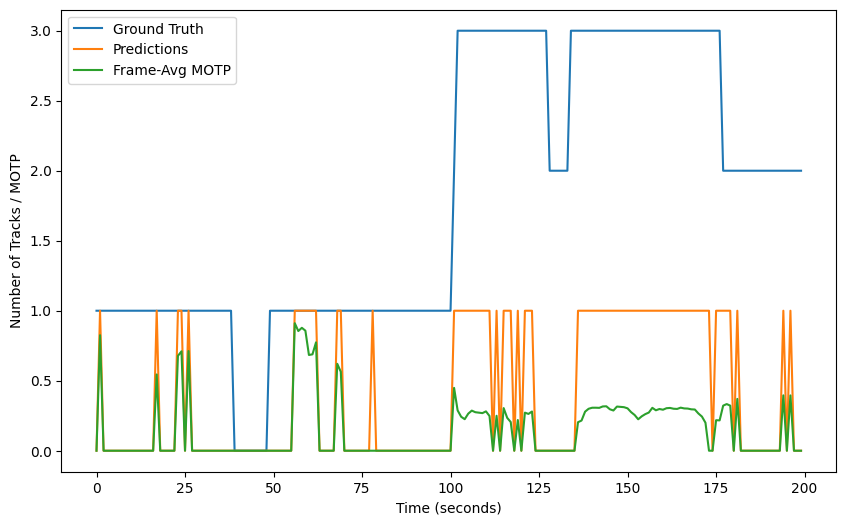

Evaluating easy2.mp4

WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

easy2.mp4 - MOTA: 0.72, MOTP: 0.6, IDF1: 0.76


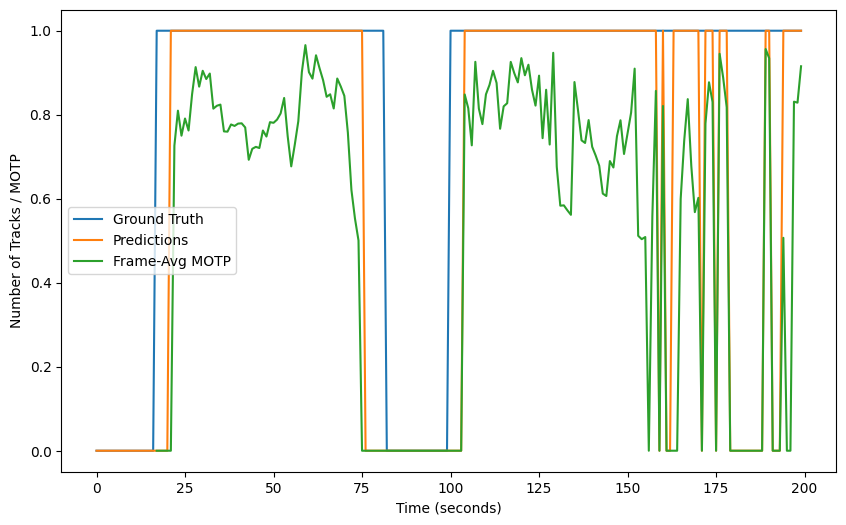

Evaluating medium2.mp4

WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

medium2.mp4 - MOTA: 0.33, MOTP: 0.27, IDF1: 0.5


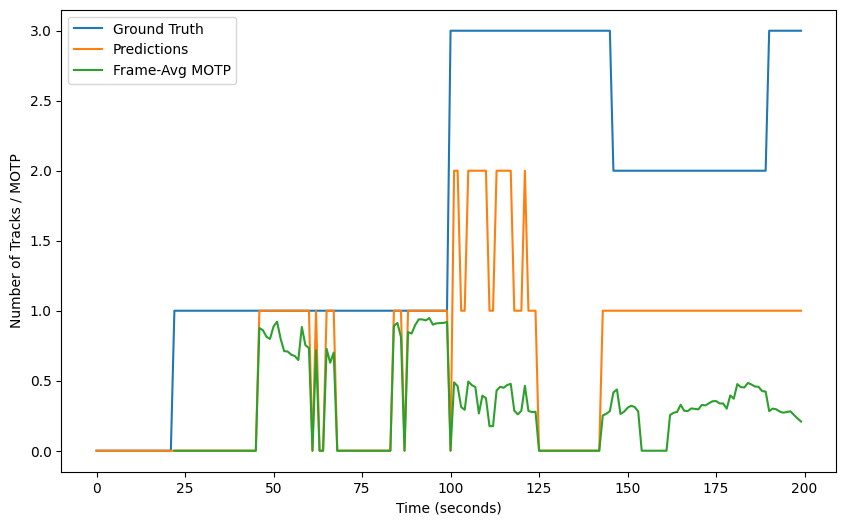

Avg results: MOTA: 0.43, MOTP: 0.37, IDF1: 0.52


In [20]:
videos = os.listdir(video_folder)
print('testing model ' + model_path)
model = YOLO(model_path)

motas = []
motps = []
idf1s = []

for video in videos:
  print(f'Evaluating {video}')
  video_path = video_folder + video
  annotations_path = annotations_folder + video[:-4] + '.csv'
  annotations = pd.read_csv(annotations_path)
  results = model.track(source=video_path, persist=True, conf=CONF_TRESHOLD, verbose=False)
  extracted_pred_results = yolo_extract_tracks(results)
  aligned_annotations = align_annotations_with_predictions_dict_corrected(annotations, extracted_pred_results, VIDEO_LENGTH)
  mota, motp, idf1, frame_avg_motp = evaluate_tracking(aligned_annotations, IOU_ASSOCIATION_TRESHOLD)
  motas.append(mota)
  motps.append(motp)
  idf1s.append(idf1)
  print(f'{video} - MOTA: {round(mota, 2)}, MOTP: {round(motp, 2)}, IDF1: {round(idf1, 2)}')
  plot_performance_graph(aligned_annotations, frame_avg_motp)

print(f'Avg results: MOTA: {round(np.mean(motas), 2)}, MOTP: {round(np.mean(motps), 2)}, IDF1: {round(np.mean(idf1s), 2)}')